<a href="https://colab.research.google.com/github/Sophie-X31/JSC270-Assignment-3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy import integrate as integrate
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

np.random.seed(1008028732)

# PART I: Approximating Pi

A. Imagine having a unit circle inscribed in a square on a coordinate system. The area of the circle is $\pi \cdot (\frac{1}{2})^2 = \frac{\pi}{4}$, while the area of the square is $(1)^2 = 1$. Then we can approximate the value of $\pi$ if we estimate the ratio $\frac{Area_{Circle}}{Area_{Square}}$ and multiply the ratio by 4. Thus, by generating a pair of random sample from Uniform[0, 1], we get a point in the square. By estimating the ratio between number of points inside the circle and number of points outside of the circle, we obtain an estimation of the ratio $\frac{Area_{Circle}}{Area_{Square}}$.

B. I tried generating 1000 pairs of uniform numbers, so it is likely ensured that there is at least one point outside of the circle, or else the ratio is undefined. Note more pairs can be generated as well, but the code will take longer to finish executing. The mean of 5000 samples is usually around 3.14, which is relatively close to the value of $\pi$.

C. I would expect the distribution of the estimates to be symmetric, because the ratio has a normal distribution. This can be proven using the reasoning in the bonus question. Note a normal distribution is symmetric.

3.1416256000000002


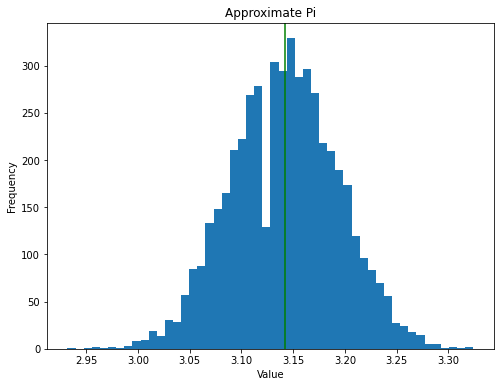

In [ ]:
# Generate Ratio
def generate(k, n):
  output = np.zeros(k)
  for j in range(k):
    circle = []
    for i in range(n):
      x = np.random.uniform(0, 1)
      y = np.random.uniform(0, 1)
      if (math.pow(x-1/2, 2) + math.pow(y-1/2, 2) <= 1/4):
        circle.append(1)
    output[j] = (4 * sum(circle)) / n
  return output

# Plot Samples
sample = generate(5000, 1000)
print(sample.mean())
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=50)
plt.title('Approximate Pi')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(x = sample.mean(), color='green')
plt.show()

# PART II: Understanding Bias

B. The bias of the sample variance formula (i.e. 1/(n-1)) has a value further to 0 for sample sizes from 10 to 100 than the other reasonable estimator (i.e. 1/n). This behavior is slightly unexpected, since the sample variance formula should be unbiased. Yet, the sample sizes are relatively small, so the result is reasonable. Notice when the sample size is 10, the -1 in the denominator has a large impact on the sample variance.

C. I would prefer the sample variance formula because being unbiased infers that it is expected to be exactly the same as the population variance. This means the estimator is very good. 

D. Procedure: Assume we have the population data.
1.   Use the population data to construct a simple linear regression model (i.e. use functions such as ols(), fit(), summary(), etc). 
2.   Find the slope parameter of the model, note this is $\beta_1$, which is a constant
3.   Randomly select samples with fixed size (e.g. 1000) from the population and use them to construct a simple linear regression model
4.   Find the slope parameters of the sample linear regression model
5.   Repeat step 4 and 5 for some number of times (e.g. 10000), note these are sample slope parameters ($\hat{\beta_1}$)
6.   Find the expected value of the sample slope parameters (i.e. use function such as mean()), the result is $E(\hat{\beta_1})$
7.   Lastly, compute the bias with the formula: 
$bias(\hat{\beta_1}) = E(\hat{\beta_1}-\beta_1) = E(\hat{\beta_1}) -\beta_1$

E. Specification of Parameters:
1.   The sample size should be the same for all samples, for example 1000, 2000, et cetera
2.   The repetition of the simulation should be large enough so the approximated result is accurate, such as taking 5000, or 10000 samples.
3.   The population slope parameter (1) should also be constant for all samples






  sample_size      bias estimator
0          10  0.466794   1/(n-1)
1          10  0.020115       1/n
2          25  0.141646   1/(n-1)
3          25 -0.024019       1/n
4          50  0.084874   1/(n-1)
5          50  0.003176       1/n
6         100  0.031227   1/(n-1)
7         100 -0.009085       1/n
8         250  0.005486   1/(n-1)
9         250 -0.010536       1/n


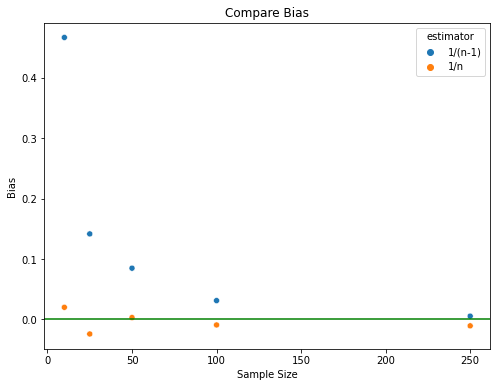

In [ ]:
# Generate Estimator
def generate2(k, n):
  unbiased, biased = np.zeros(k), np.zeros(k)
  for j in range(k):
    sum = 0
    for i in range(n):
      s = np.random.normal(2, 2)
      sum = sum + math.pow((s-2), 2)
    unbiased[j], biased[j] = (1/(n-1)) * sum, (1/n) * sum
  return (unbiased, biased)

# Find Bias
def cal_bias(k, n):
  sample = generate2(k, n)
  return (sample[0].mean() - 4, sample[1].mean() - 4)

# Plot and Compare
compare = pd.DataFrame(columns=['sample_size', 'bias', 'estimator'], index=range(10))
sizes = [10, 25, 50, 100, 250]
for i in range(5):
  bias = cal_bias(1000, sizes[i])
  compare.iloc[[2*i], [0, 1, 2]] = [sizes[i], bias[0], '1/(n-1)']
  compare.iloc[[2*i+1], [0, 1, 2]] = [sizes[i], bias[1], '1/n']
print(compare)

plt.figure(figsize=(8, 6))
graph = sns.scatterplot(data=compare, y ='bias', x ='sample_size', hue='estimator')
plt.title('Compare Bias')
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.axhline(y = 0, color='green')
plt.show()

# PART III: Simulation IRL

See solution doc.

# PART IV: Asymptotic Behavior

A. The sample mean gets closer to 2 as the sample size increases. This is expected, as this is a result of the law of large numbers. The value of the mean does not matter, as long as the random variable is iid, and it has finite mean and variance, when the sample size increases, the sample mean should approach the population mean.

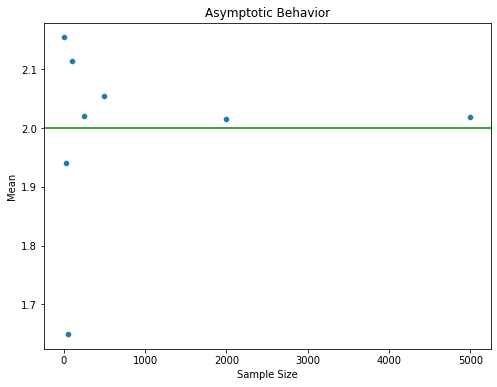

In [ ]:
# Generate Sample
dataset = pd.DataFrame(columns=['sample_size', 'mean'], index=range(8))
sizes2 = [10, 25, 50, 100, 250, 500, 2000, 5000]
for i in range(8):
  dataset.iloc[[i], [0, 1]] = [sizes2[i], np.random.exponential(2, sizes2[i]).mean()]

# Plot Data
plt.figure(figsize=(8, 6))
graph = sns.scatterplot(data=dataset, y ='mean', x ='sample_size')
plt.title('Asymptotic Behavior')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.axhline(y = 2, color='green')
plt.show()

B. There is no clear correlation between the sample size and the sample mean. This is expected, because the law of large numbers essentially means the sample mean converges in probability to the population mean, which does not apply to the Cauchy distributions.

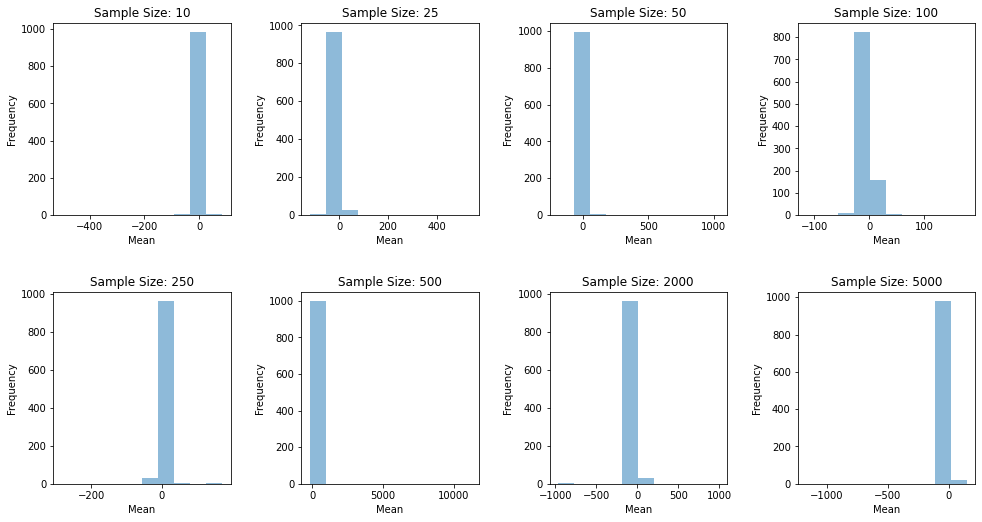

In [ ]:
# Generate Sample
def generate4(n):
  output = pd.DataFrame(columns=['sample_size', 'mean'], index=range(8*n))
  for j in range(n):
    for i in range(8):
      output.iloc[[8*j + i], [0, 1]] = [sizes2[i], np.random.standard_cauchy(sizes2[i]).mean()]
  return output

# Plot Data
dataset2 = generate4(1000)
plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.title('Sample Size: ' + str(sizes2[i]))
  plt.xlabel('Mean')
  plt.ylabel('Frequency')
  plt.hist(dataset2[dataset2['sample_size'] == sizes2[i]]['mean'], 
           alpha=0.5, label=str(sizes2[i]))
plt.show()

# PART V: Logistic Regression

See solution doc.